# Import the libraries


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import ydata_profiling as yp

In [2]:
sns.set_style("darkgrid")
sns.set_palette("crest_r")

In [3]:
import warnings

warnings.simplefilter("ignore")

# Read the dateset


In [4]:
df = pd.read_csv(r"supermarket_sales - Sheet1.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


# Data Exploration


In [5]:
df.shape

(1000, 17)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [7]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [8]:
df.describe(include="object")

,Invoice ID,Branch,City,Customer type,Gender,Product line,Date,Time,Payment
count,1000,1000,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,89,506,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,2/7/2019,19:48,Ewallet
freq,1,340,340,501,501,178,20,7,345


In [9]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
branch_city = df["Branch"] + "_" + df["City"]
branch_city.value_counts()

A_Yangon       340
B_Mandalay     332
C_Naypyitaw    328
Name: count, dtype: int64

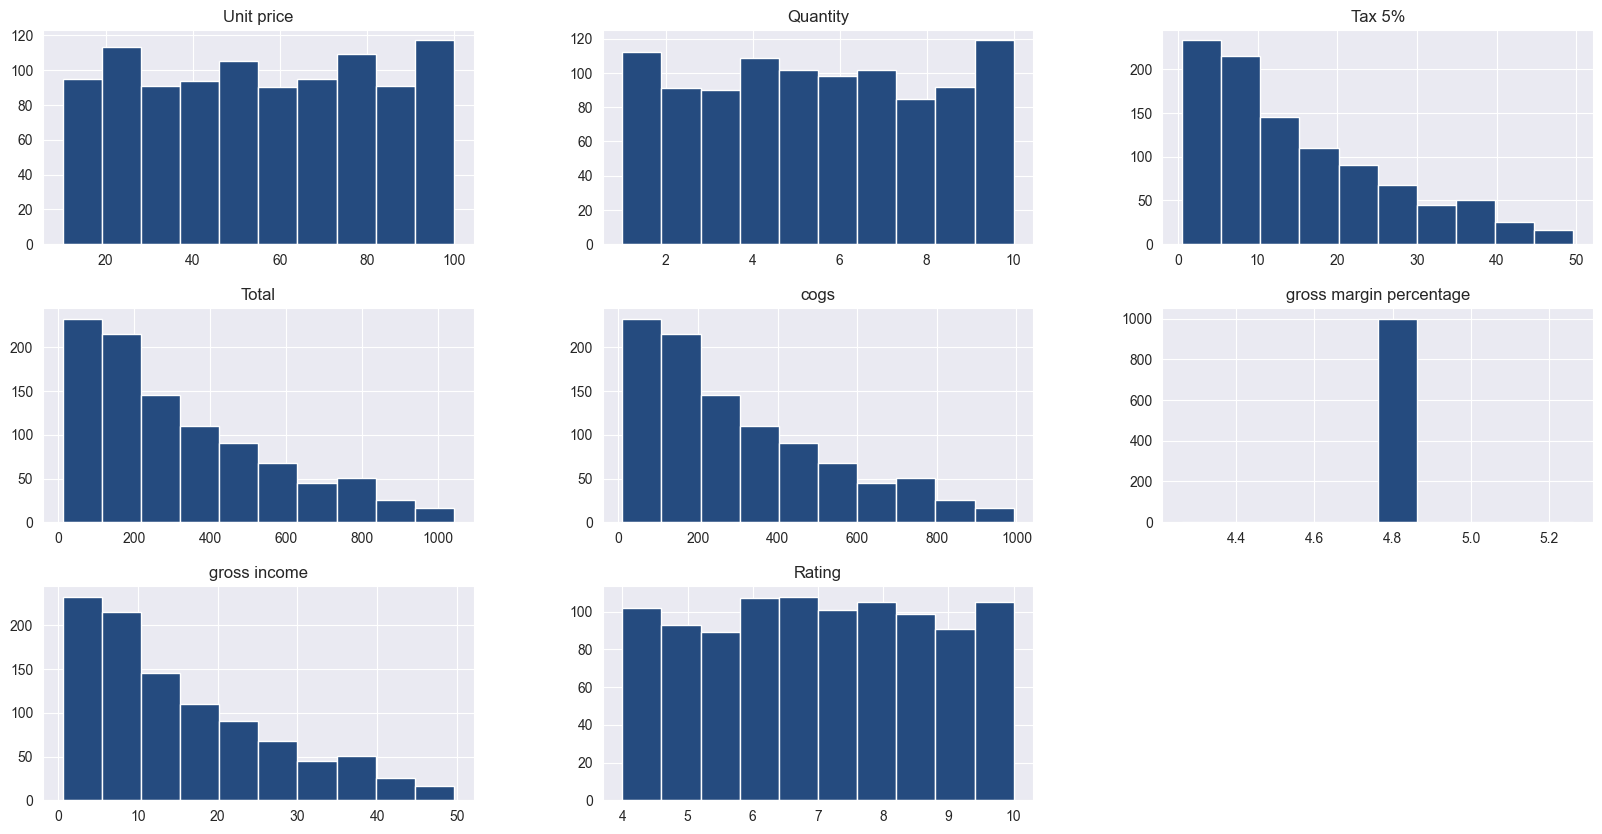

In [12]:
df.hist(figsize=(20, 10))
plt.show()

# Observations

- No missing values
- No duplicate values
- The branches is distinguished by city(each branch in a city)
- All records are in 2019
- The Gross margin percentage is a constant value over all bills
- The gross income value is the tax value
- `Total` column is equal to `COGS` + `Tax`
- `Tax` is strongly related to `Total` and `cogs`.
- `gross margin percentage` is proportional to the tax percentage (GM = tax/(1 + tax))


# Data Cleaning


In [13]:
df["Branch"] = df["Branch"].replace(
    {"A": "A_Yangon", "B": "B_Mandalay", "C": "C_Naypyitaw"}
)

In [14]:
time = pd.to_datetime(df["Time"])
df["Time(H)"] = time.dt.hour

In [15]:
date = pd.to_datetime(df["Date"])
df["Day"] = date.dt.day
df["Month"] = date.dt.month

In [16]:
df["gross income"] = df["gross income"].round().astype(int)

In [17]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Time(H),Day,Month
0,750-67-8428,A_Yangon,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26,9.1,13,5,1
1,226-31-3081,C_Naypyitaw,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,4,9.6,10,8,3
2,631-41-3108,A_Yangon,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16,7.4,13,3,3
3,123-19-1176,A_Yangon,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23,8.4,20,27,1
4,373-73-7910,A_Yangon,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30,5.3,10,8,2


In [18]:
df.drop(
    columns=[
        "Invoice ID",
        "City",
        "gross margin percentage",
        "Tax 5%",
        "Unit price",
        "Date",
        "Quantity",
        "Total",
        "Time",
        "cogs",
    ],
    inplace=True,
)

In [19]:
df = df[
    [
        "Branch",
        "Customer type",
        "Gender",
        "Product line",
        "Payment",
        "Time(H)",
        "Day",
        "Month",
        "gross income",
        "Rating",
    ]
]

In [20]:
df.head()

,Branch,Customer type,Gender,Product line,Payment,Time(H),Day,Month,gross income,Rating
0,A_Yangon,Member,Female,Health and beauty,Ewallet,13,5,1,26,9.1
1,C_Naypyitaw,Normal,Female,Electronic accessories,Cash,10,8,3,4,9.6
2,A_Yangon,Normal,Male,Home and lifestyle,Credit card,13,3,3,16,7.4
3,A_Yangon,Member,Male,Health and beauty,Ewallet,20,27,1,23,8.4
4,A_Yangon,Normal,Male,Sports and travel,Ewallet,10,8,2,30,5.3


# Univariate analysis


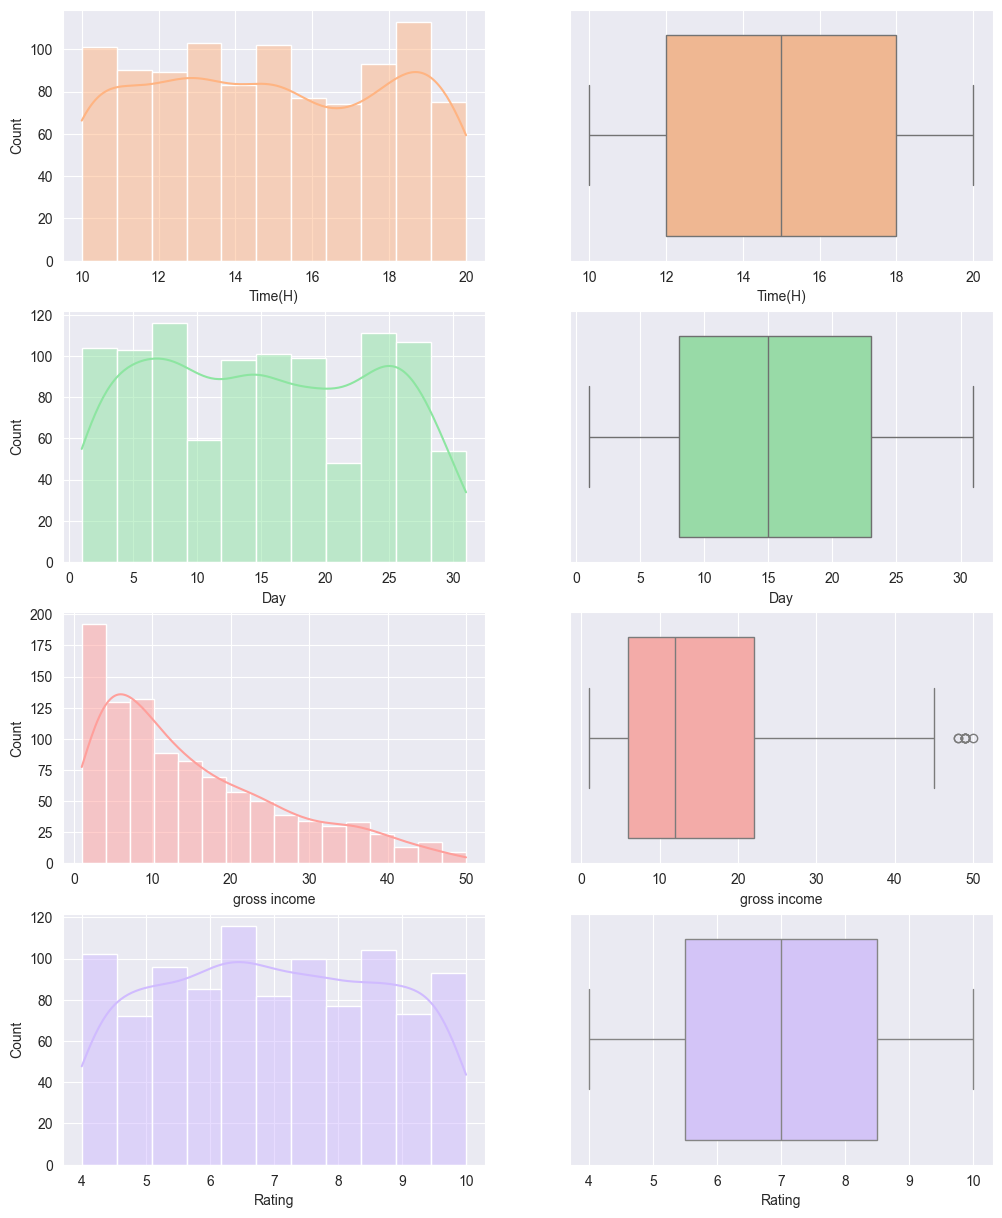

In [21]:
numerical = ["Time(H)", "Day", "gross income", "Rating"]
fig, ax = plt.subplots(4, 2, figsize=(12, 15))
palette = sns.palettes.color_palette("pastel", 6)
ax.flatten()
for i, col in enumerate(numerical):
    sns.histplot(data=df, x=col, ax=ax[i, 0], kde=True, color=palette[i + 1])
    sns.boxplot(data=df, x=col, ax=ax[i, 1], color=palette[i + 1])

# What can we get from the data?

- What is the customer type distribusion?
- What is the most popular product line?
- what is the most convenient way of payment for each customer type?
- What is the most active time?
- What is the most productive branch?


## 1. What is the customer type distribustion?


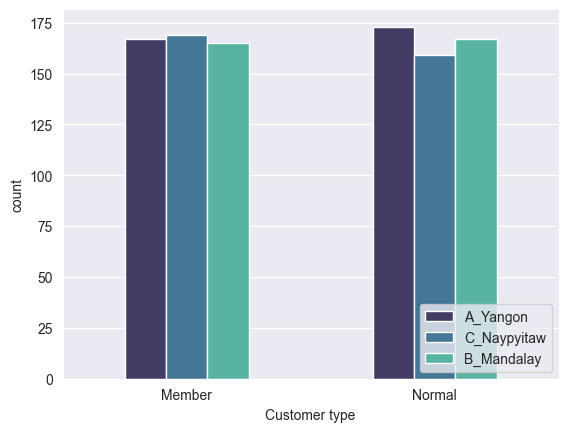

In [22]:
sns.countplot(data=df, hue="Branch", x="Customer type", width=0.5, palette="mako")
plt.legend(loc="lower right")
plt.show()

`All branches have almost the same portion of customers with the same type distribution`


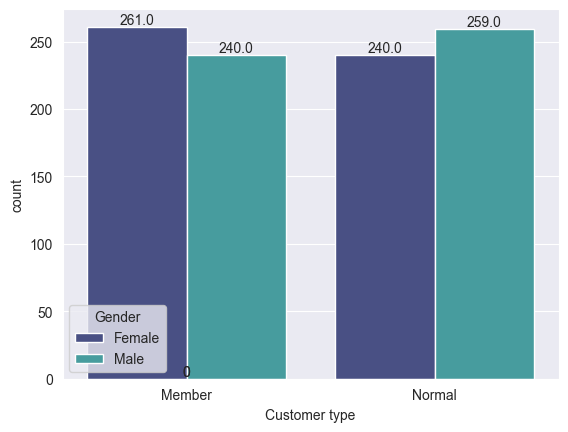

In [23]:
ax = sns.countplot(data=df, x="Customer type", hue="Gender", palette="mako")
# add the annotations
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f"{count}", xy=(x, y), ha="center", va="bottom")


plt.show()

`Female cumstomers are as many as male customers in each customer type`


In [24]:
df.head()

,Branch,Customer type,Gender,Product line,Payment,Time(H),Day,Month,gross income,Rating
0,A_Yangon,Member,Female,Health and beauty,Ewallet,13,5,1,26,9.1
1,C_Naypyitaw,Normal,Female,Electronic accessories,Cash,10,8,3,4,9.6
2,A_Yangon,Normal,Male,Home and lifestyle,Credit card,13,3,3,16,7.4
3,A_Yangon,Member,Male,Health and beauty,Ewallet,20,27,1,23,8.4
4,A_Yangon,Normal,Male,Sports and travel,Ewallet,10,8,2,30,5.3


## 2. What is the most popular product line?


In [25]:
df["Product line"].value_counts().to_frame().rename(columns={"Product line": "count"})

,count
Product line,
Fashion accessories,178
Food and beverages,174
Electronic accessories,170
Sports and travel,166
Home and lifestyle,160
Health and beauty,152


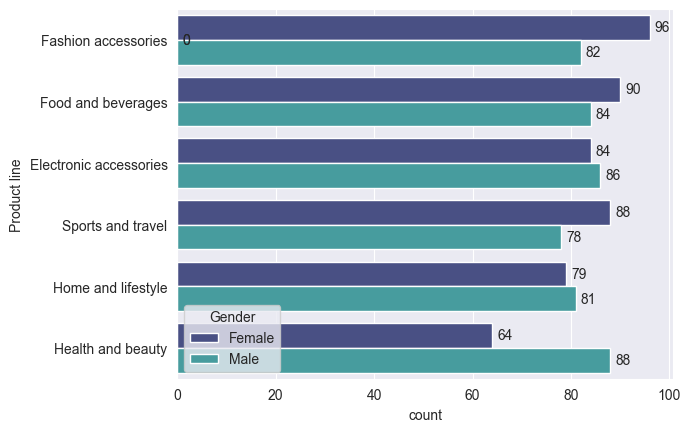

In [26]:
ax = sns.countplot(
    data=df,
    y="Product line",
    palette="mako",
    order=df["Product line"].value_counts().index,
    hue="Gender",
)
for p in ax.patches:
    count = p.get_width()
    ax.annotate(
        f"{int(count)}", xy=(count + 1, p.get_y() + p.get_height() / 2), va="center"
    )
plt.show()

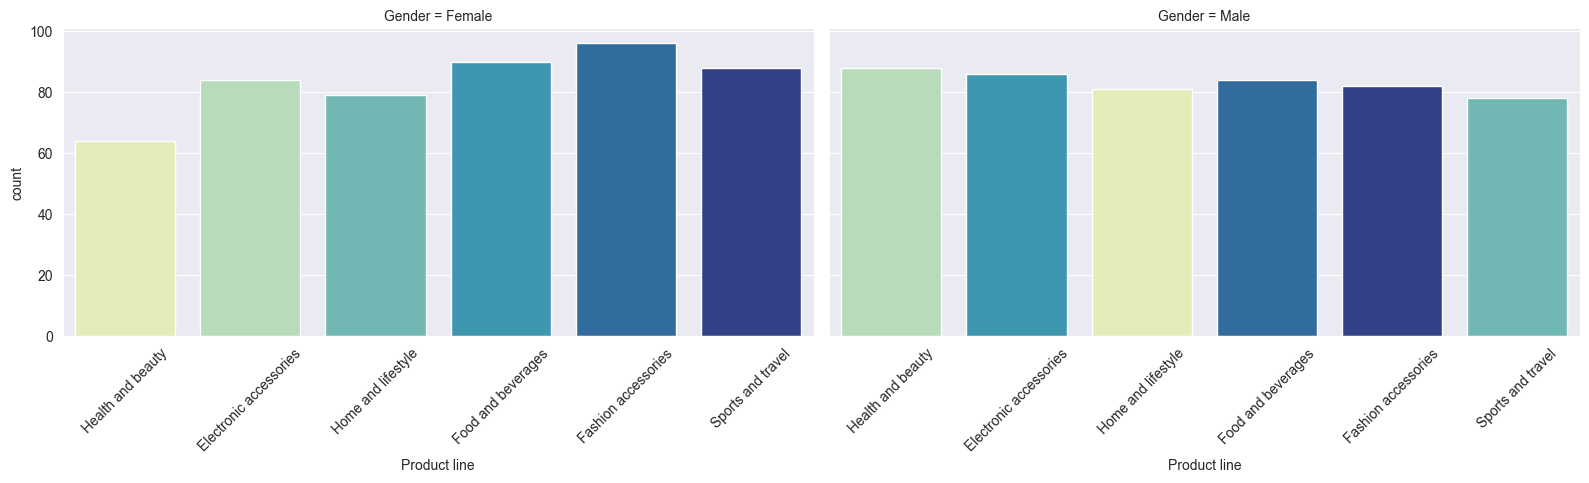

In [27]:
g = sns.FacetGrid(df, col="Gender", aspect=2, height=4, sharey=True, legend_out=True)
g.map(sns.countplot, "Product line", palette="YlGnBu")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.show()

- Fashion category is the most popular category especially for women.
- Beauty category is the most popular for men.


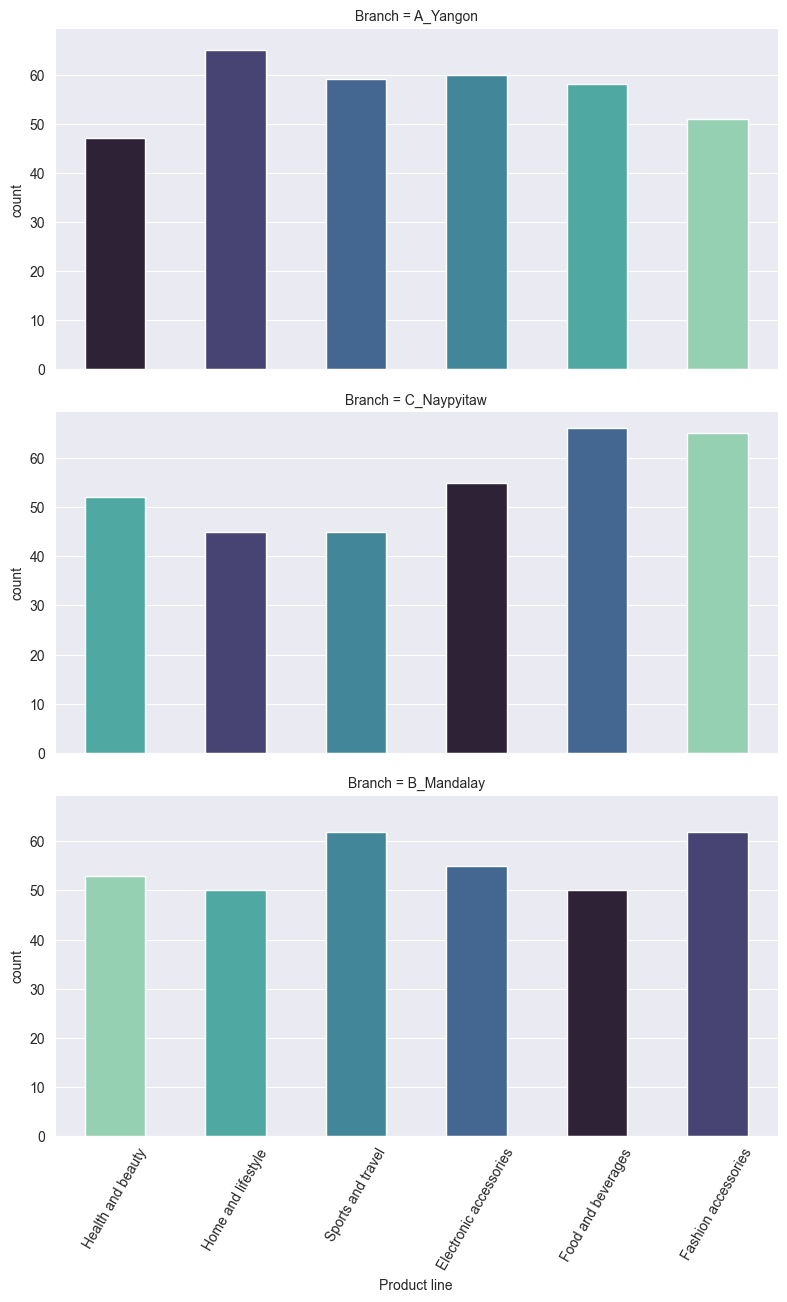

In [28]:
g = sns.FacetGrid(df, row="Branch", aspect=2, height=4, sharey=True, legend_out=True)


g.map(sns.countplot, "Product line", palette="mako", width=0.5)


plt.xticks(rotation=60)


plt.show()

All categories are colse to each other in each branch, except:

- for C, `Home`,`Sports` are less compared to `Fashion`, `Food`
- for A, `Beauty` is the least popular, but`Home & Lifestyle` is the most.
- for B, `Food`,`Home` are less compared to `Fashion`, `Sports`


## 3. What is the most convenient way of payment for each customer type?


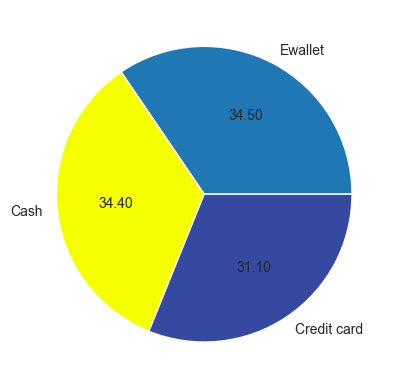

In [29]:
plt.pie(
    df["Payment"].value_counts(),
    labels=df["Payment"].unique(),
    autopct="%.2f",
    colors=["#1f77b4", "#f5ff00", "#34499f"],
)
plt.show()

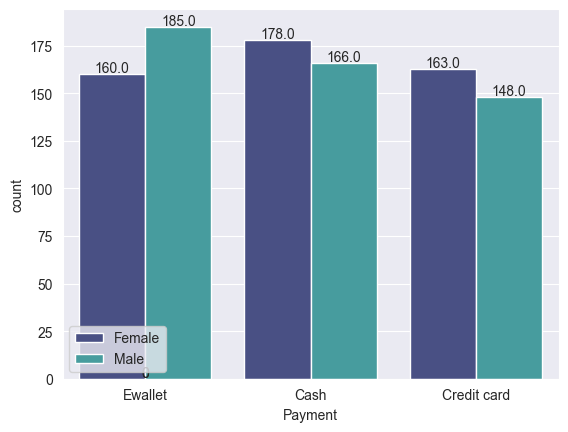

In [30]:
ax = sns.countplot(data=df, x="Payment", palette="mako", hue="Gender")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2, p.get_height() + 1),
        ha="center",
    )
plt.legend(loc="lower left")

- `Ewallet` is more popular in men than women.
- Females use `Cash` and `Credit card` more than males.


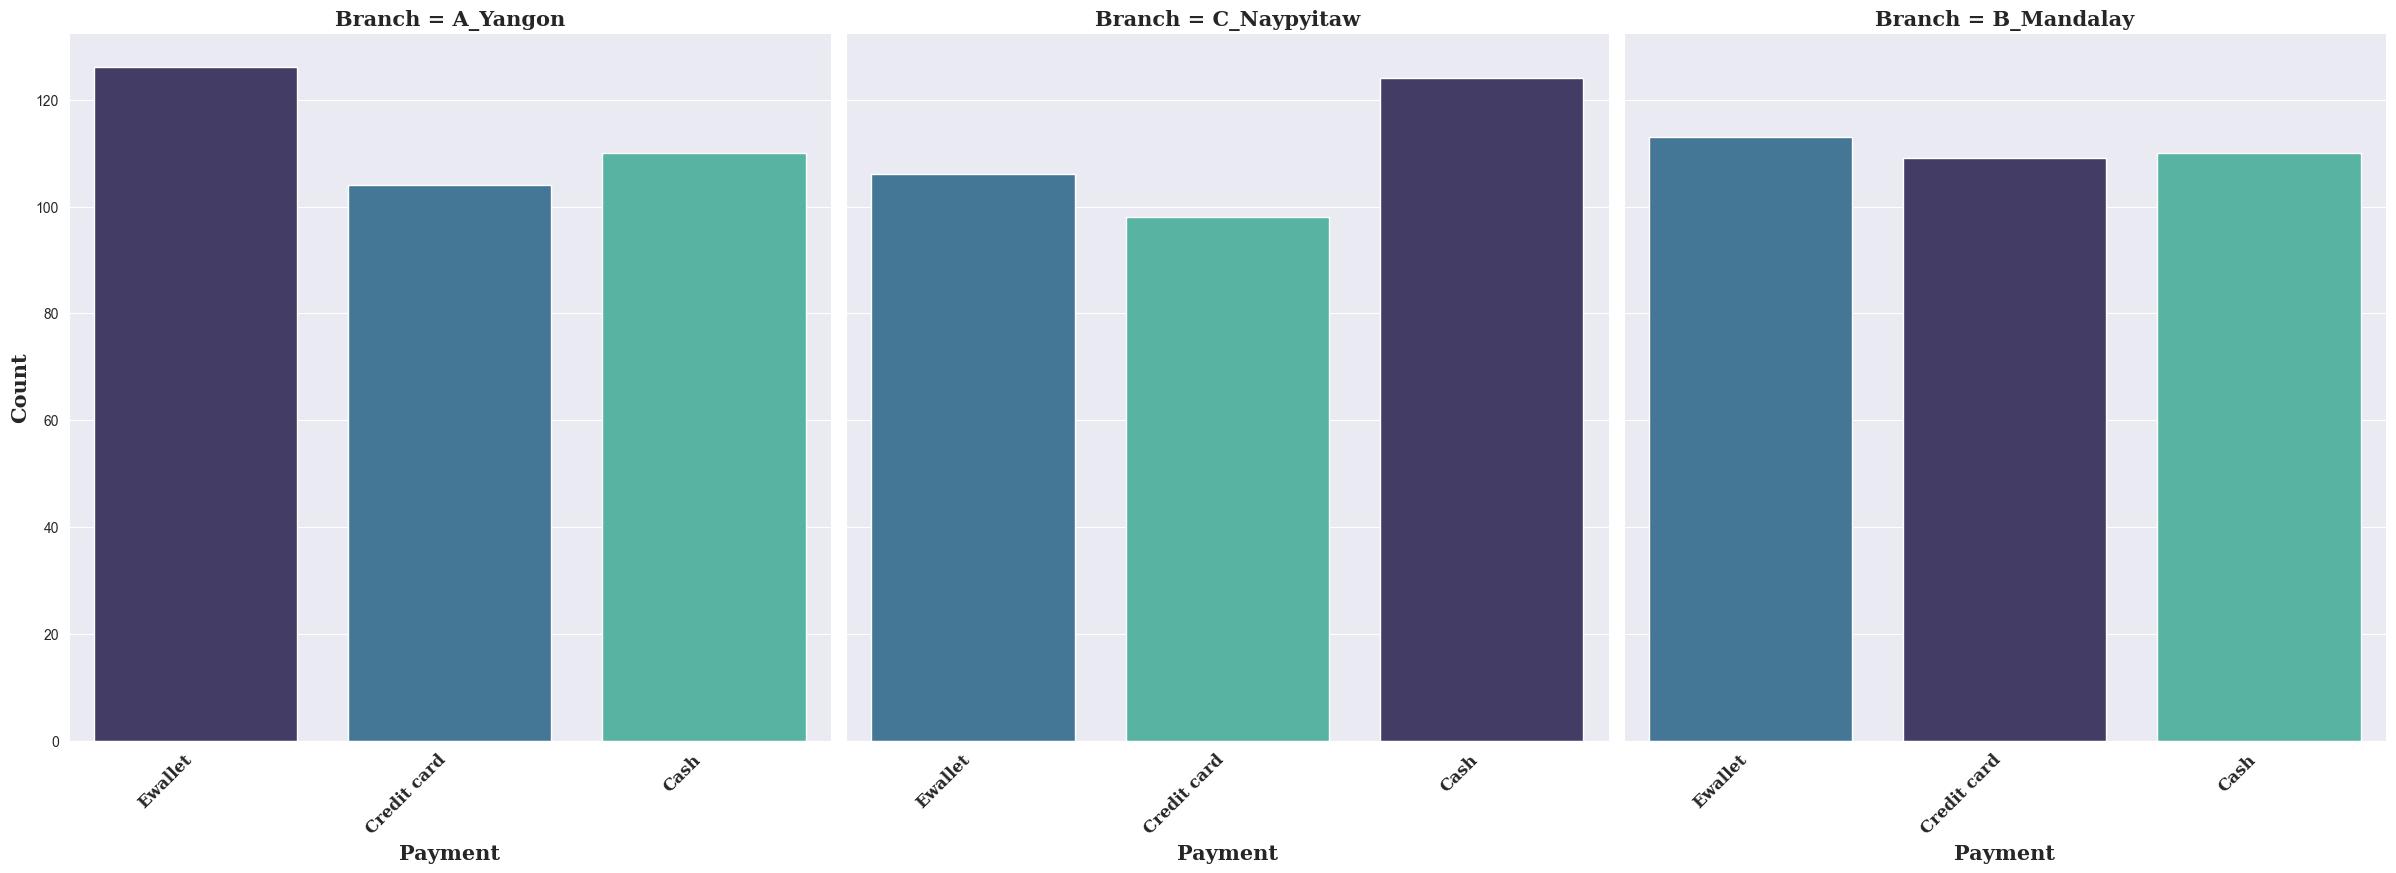

In [31]:
g = sns.FacetGrid(df, col="Branch", aspect=1, height=8, sharey=True, legend_out=True)
g.map(sns.countplot, "Payment", palette="mako")
for ax in g.axes.flat:
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        ha="right",
        fontdict={"family": "serif", "weight": "bold", "size": 12},
    )
    ax.set_xlabel("Payment", fontdict={"family": "serif", "weight": "bold", "size": 15})
    ax.set_ylabel("Count", fontdict={"family": "serif", "weight": "bold", "size": 15})
    ax.set_title(
        ax.get_title(), fontdict={"family": "serif", "weight": "bold", "size": 15}
    )


plt.show()

- For A, `Ewallet` is th most popular method.
- For C, `Cash` is th most popular method.
- For B, all methods are almost the same.


## 4. What is the most active time?


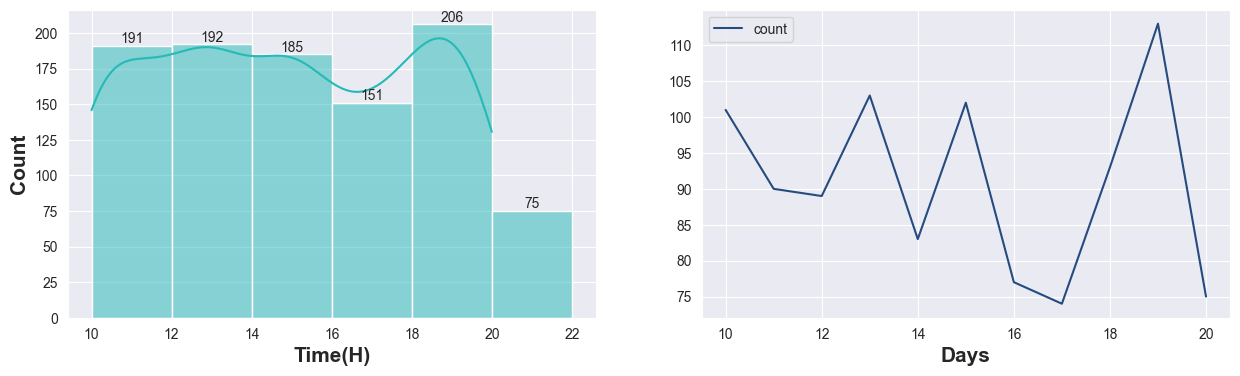

In [32]:
fiq, ax = plt.subplots(1, 2, figsize=(15, 4))
bins = [10, 12, 14, 16, 18, 20, 22]
day_count = (
    df["Time(H)"]
    .value_counts()
    .sort_index()
    .to_frame()
    .rename(columns={"Time(H)": "count"})
)

ax = ax.flatten()
sns.histplot(df["Time(H)"], bins=bins, color="#24bab7", ax=ax[0], kde=True)
for p in ax[0].patches:
    ax[0].annotate(
        f"{p.get_height()}",
        (p.get_x() + p.get_width() / 2, p.get_height() + 2),
        ha="center",
    )
ax[0].set_xticks(bins)
ax[0].set_xlabel(
    "Time(H)", fontdict={"family": "sans-serif", "weight": "bold", "size": 15}
)
ax[0].set_ylabel(
    "Count", fontdict={"family": "sans-serif", "weight": "bold", "size": 15}
)


sns.lineplot(
    data=day_count,
    color="#24bab7",
    ax=ax[1],
)
ax[1].set_xlabel(
    "Days", fontdict={"family": "sans-serif", "weight": "bold", "size": 15}
)

plt.show()

- `10-16` is the most active period while `20-22` has the minimum records.
- Days `[13, 15, 19]` are the most active days.


<Figure size 1500x800 with 0 Axes>

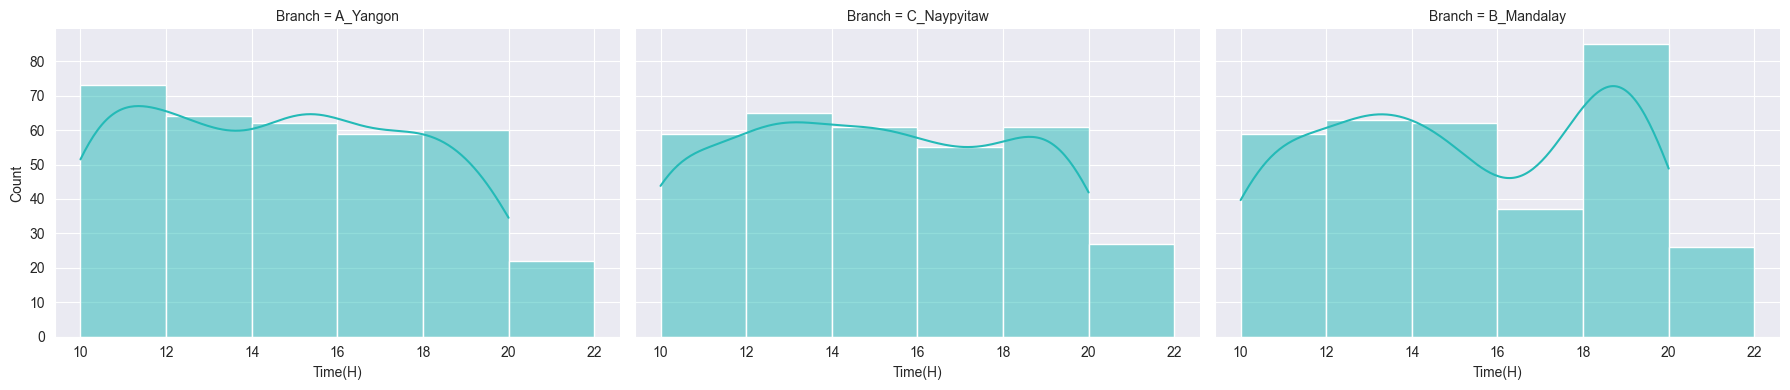

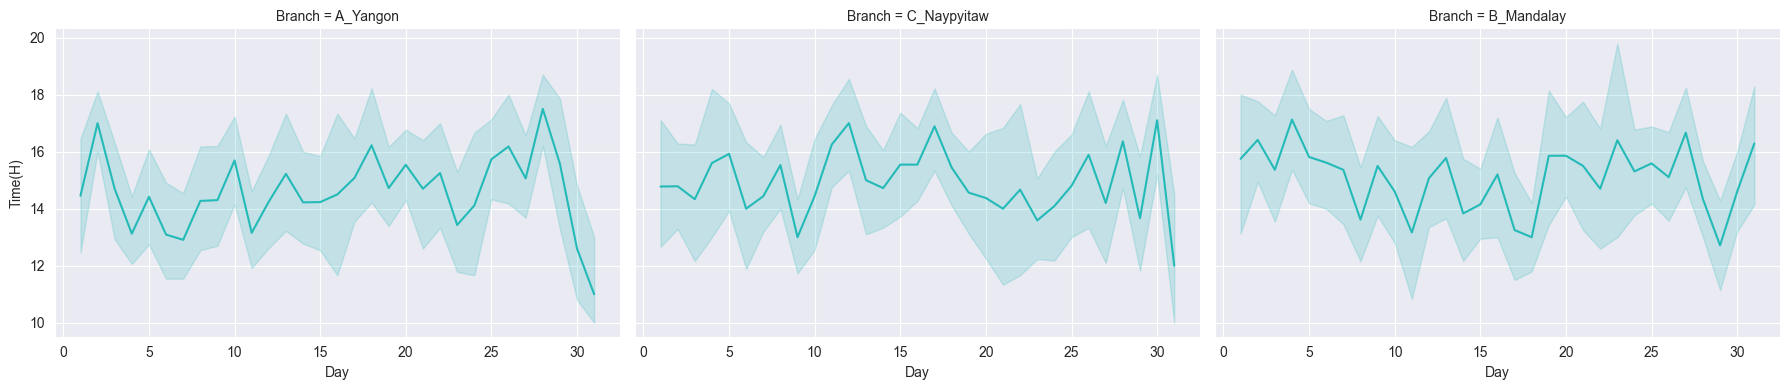

In [33]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

g1 = sns.FacetGrid(df, col="Branch", aspect=1.5, height=4, legend_out=True)
g1.map(sns.histplot, "Time(H)", color="#24bab7", bins=bins, kde=True)

g2 = sns.FacetGrid(df, col="Branch", aspect=1.5, height=4, legend_out=True)
g2.map(sns.lineplot, "Day", "Time(H)", color="#24bab7")

ax2.remove()
ax1.remove()
plt.show()

- In branch B, `18 - 20` is the most busy time


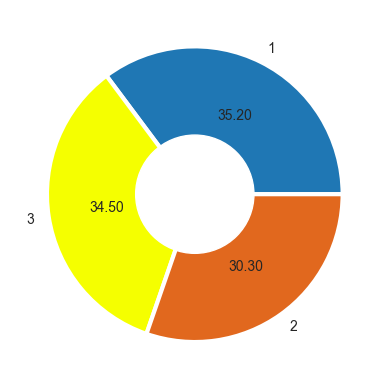

In [34]:
plt.pie(
    df["Month"].value_counts(),
    labels=df["Month"].unique(),
    autopct="%.2f",
    colors=["#1f77b4", "#f5ff00", "#e1681e"],
    wedgeprops={"linewidth": 3, "edgecolor": "white"},
)
centre_circle = plt.Circle((0, 0), 0.4, color="white")
plt.gca().add_artist(centre_circle)
plt.show()

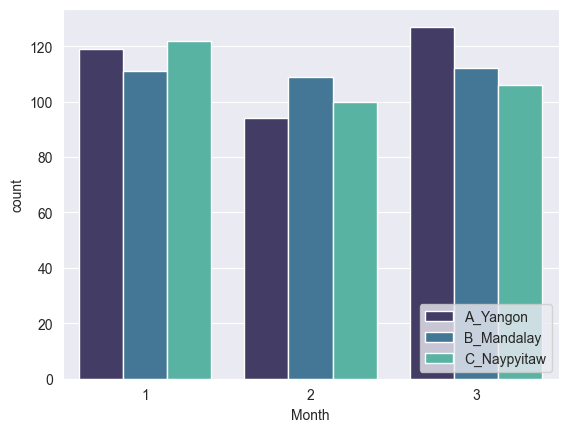

In [35]:
sns.countplot(data=df, x="Month", palette="mako", hue="Branch")
plt.legend(loc="lower right")
plt.show()

In [36]:
df.head()

,Branch,Customer type,Gender,Product line,Payment,Time(H),Day,Month,gross income,Rating
0,A_Yangon,Member,Female,Health and beauty,Ewallet,13,5,1,26,9.1
1,C_Naypyitaw,Normal,Female,Electronic accessories,Cash,10,8,3,4,9.6
2,A_Yangon,Normal,Male,Home and lifestyle,Credit card,13,3,3,16,7.4
3,A_Yangon,Member,Male,Health and beauty,Ewallet,20,27,1,23,8.4
4,A_Yangon,Normal,Male,Sports and travel,Ewallet,10,8,2,30,5.3


## 5. What is the most productive branch?


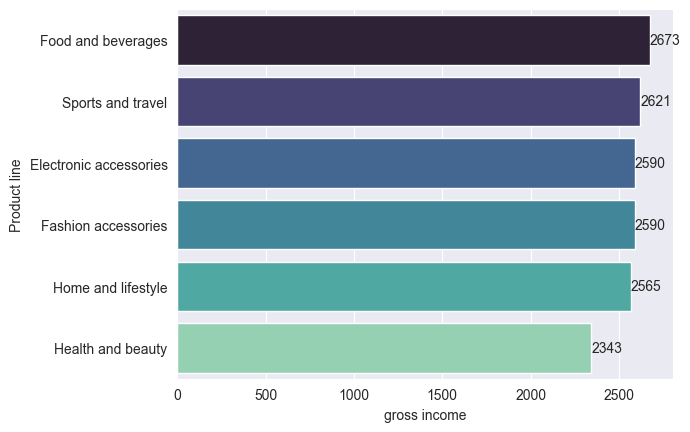

In [37]:
order = (
    df.groupby("Product line")["gross income"].sum().sort_values(ascending=False).index
)
ax = sns.barplot(
    data=df,
    x="gross income",
    y="Product line",
    palette="mako",
    estimator=sum,
    ci=None,
    order=order,
)
for container in ax.containers:
    ax.bar_label(container)

- `Food and beverages` has the largest gross income while `Health and Beauty` has the minimum.


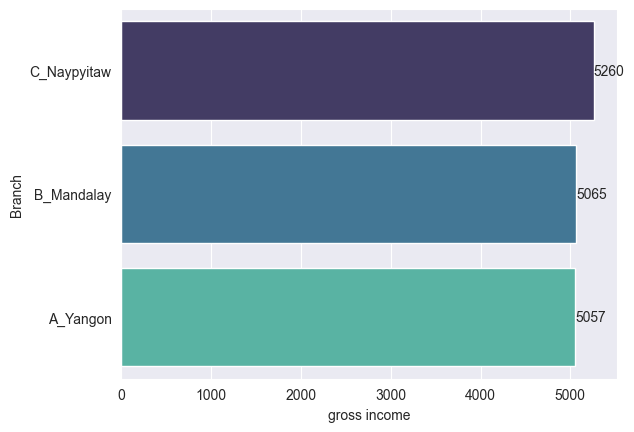

In [38]:
order = df.groupby("Branch")["gross income"].sum().sort_values(ascending=False).index
ax = sns.barplot(
    data=df,
    x="gross income",
    y="Branch",
    palette="mako",
    estimator=sum,
    ci=None,
    order=order,
)
for container in ax.containers:
    ax.bar_label(container)

- All branches have close gross income vlaue


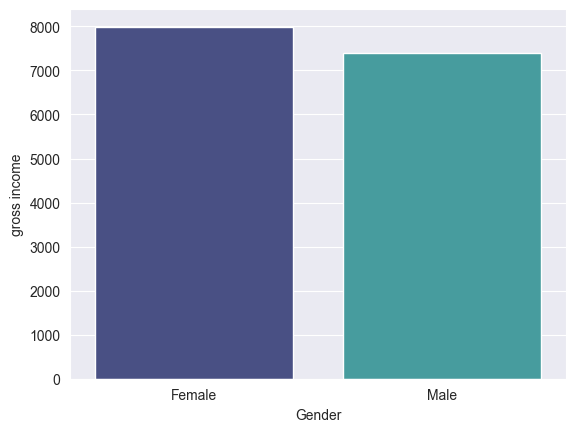

In [39]:
sns.barplot(
    data=df, x="Gender", y="gross income", palette="mako", estimator=sum, ci=None
)
plt.show()

- Femals spend more money in the market.


All questions have been answered, hope the analysis was simple and informative.
